https://codetorial.net/tensorflow/get_output_of_neuron_layers.html

특정 입력 데이터에 대해 각 뉴런층이 출력하는 값을 확인하는 방법에 대해 알아보는 것이 이번 파트의 목적
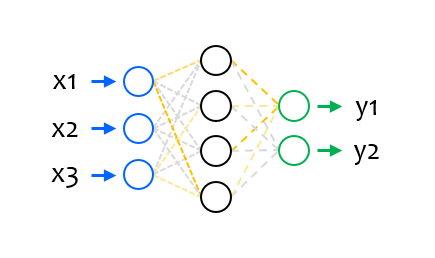

1) 훈련 데이터 준비하기

2) 뉴런층 만들기

3) Neural Network 구성하기

4) Neural Network 컴파일하기

5) 은닉층의 출력값 확인하기

6) 출력층의 출력값 확인하기

In [2]:
# 1. 훈련 데이터 준비하기
# 우선 tf.random 모듈의 set_seed() 함수를 사용해서 랜덤 시드를 설정했습니다.
# 예제에서 x_train, y_train은 각각 훈련에 사용할 입력값, 출력값입니다.
# 이 페이지에서는 훈련은 진행하지 않고 입력 데이터 (x_train)에 대해 각 뉴런층이 출력하는 값을 확인합니다.
import tensorflow as tf
import numpy as np

tf.random.set_seed(0)


# 1. 훈련 데이터 준비하기
x_train = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
y_train = np.array([[0], [1], [1]])

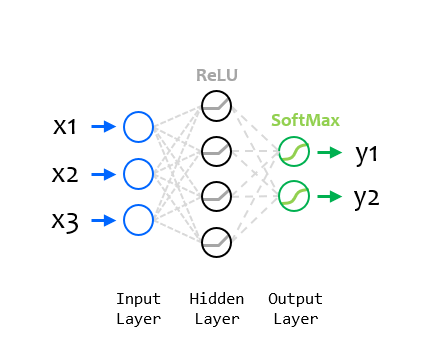
아래와 같은 간단한 신경망 모델을 구성하기 위한 뉴런층을 각각 만들었습니다.

길이 3을 갖는 벡터 입력을 받고, 은닉층은 네 개의 뉴런 노드를 가지며, 출력층은 두 개의 뉴런 노드를 가집니다.

은닉층의 활성화함수는 ‘relu’, 출력층의 활성화함수는 ‘softmax’로 지정했습니다.

In [3]:
# 2. 뉴런층 만들기
input_layer = tf.keras.layers.InputLayer(input_shape=(3,))
hidden_layer = tf.keras.layers.Dense(units=4, activation='relu')
output_layer = tf.keras.layers.Dense(units=2, activation='softmax')

In [4]:
# 3. Neural Network 구성하기

# 3. 모델 구성하기
# tf.keras 모듈의 Sequantial 클래스는 Neural Network의 각 층을 순서대로 쌓을 수 있도록 합니다.
# 앞에서 만든 뉴런층을 순서대로 입력해서 신경망 모델을 구성합니다.

model = tf.keras.Sequential([
  input_layer,
  hidden_layer,
  output_layer
  ])

In [5]:
# 4. Neural Network 컴파일하기

# 4. 모델 컴파일하기
# 손실 함수로 ‘mse’를, 옵티마이저로 ‘Adam’을 지정했습니다.

# 이 페이지의 예제에서는 훈련을 진행하지 않기 때문에 컴파일 과정은 생략할 수 있습니다.
model.compile(loss='mse', optimizer='Adam')

In [6]:
# 5. 은닉층의 출력 확인하기
intermediate_layer_model = tf.keras.Model(inputs=model.input, outputs=model.layers[0].output)
intermediate_output = intermediate_layer_model(x_train)

print('======== Inputs ========')
print(x_train)

print('\n======== Weights of Hidden Layer ========')
print(hidden_layer.get_weights()[0])

print('\n======== Outputs of Hidden Layer ========')
print(intermediate_output)

======== Inputs ========
[[1 0 0]
 [0 1 0]
 [0 0 1]]

======== Weights of Hidden Layer ========
[[-0.3851872  -0.54333335  0.0655309   0.1134268 ]
 [-0.15428883  0.5699866  -0.01254469  0.9223561 ]
 [ 0.36428273 -0.6936733   0.38850498  0.30073535]]

======== Outputs of Hidden Layer ========
tf.Tensor(
[[0.         0.         0.0655309  0.1134268 ]
 [0.         0.5699866  0.         0.9223561 ]
 [0.36428273 0.         0.38850498 0.30073535]], shape=(3, 4), dtype=float32)


tf.keras 모듈의 Model 클래스를 사용해서 새로운 모델 (intermediate_layer_model)을 하나 만들었습니다.

이 모델은 앞에서 구성한 전체 모델의 입력을 입력으로 하고,

첫번째 뉴런층 (hidden_layer)의 출력을 출력으로 하는 신경망 모델입니다.

이 모델에 훈련 데이터 (x_train)을 입력하면 첫번째 뉴런층의 출력을 반환합니다.

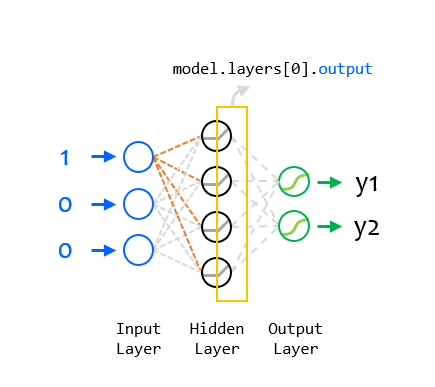

첫번째 뉴런층, 즉 은닉층의 출력은 아래와 같이 계산됩니다.
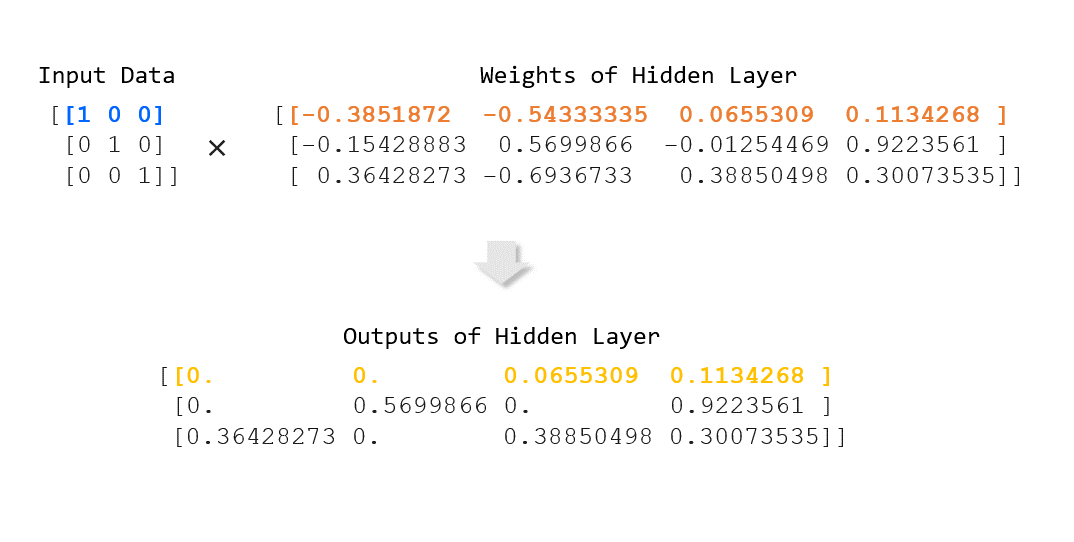

우선 입력 데이터 [1, 0, 0]에 대해 은닉층의 시냅스 가중치가 곱해집니다.

즉, 입력층 첫번째 노드의 입력 1에 시냅스 가중치 [-0.3851872 -0.54333335 0.0655309 0.1134268 ]가 곱해집니다.

다음으로 은닉층의 활성화함수인 ReLU (Rectified Linear Unit)가 적용되어서

0보다 작은 값은 0이되고, 0보다 큰 값은 그대로 출력값이 됩니다.

In [7]:
# 6. 출력층의 출력 확인하기
# 전체 신경망의 출력값은 Model 클래스의 predict() 메서드를 사용해서 간단하게 얻을 수 있습니다.
# 세 개의 값을 갖는 세 개의 입력 데이터 벡터에 대해 두 개의 값을 갖는 벡터 세 개를 출력합니다.
pred = model.predict(x_train)

print('\n======== Outputs of Output Layer ========')
print(pred)


======== Outputs of Output Layer ========
[[0.45516008 0.5448399 ]
 [0.18469977 0.8153002 ]
 [0.4541021  0.5458979 ]]


In [ ]:
# 결과 : 중간에 어떤 과정이 되어 있는지 조금 더 추측할 수 있다.